In [2]:
# установим библиотеки
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# проверим версию
import sklearn
sklearn.__version__

'1.3.2'

In [87]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns',  12)

Загрузим данные для обучения и тестирования

In [88]:
df = pd.read_csv('/content/drive/MyDrive/BMSTU Data analyst/6_Theme/6_theme_practice_1/titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разметка - это столбец Survived

Некоторые столбцы не информативны, их надо удалить.
Столбцы: PassengerID, Name.

In [90]:
df.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Столбцы Ticket, Cabin, Embarked также не несут никакой смысловой нагрузки для классификации. Удалим их.  

In [92]:
df.drop(['Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [93]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [94]:
df.shape

(891, 7)

In [95]:
df = df.dropna()

Заменим столбец Sex на числовые коды

In [96]:
df.replace({'male':1, 'female':0})

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [97]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [98]:
df = df.replace({'male':1, 'female':0})

In [99]:
df['Parch'].value_counts()

,count
Parch,
0,521
1,110
2,68
5,5
3,5
4,4
6,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


Выберем целевую переменную

In [101]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


Выберем другие данные для обучения

In [102]:
X = df.iloc[:, 1:]

In [103]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


преобразуем данные в массивы numpy для упрощения работы

In [104]:
y = np.array(y)
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [105]:
X = np.array(X)
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

Разделим нашу выборку на обучающую и тестовую

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [107]:
X_train.shape

(571, 6)

In [108]:
X_test.shape

(143, 6)

Подберем параметры через сетку Grid

In [124]:
np.random.seed(42)

param_grid = {'max_features':[None, 'sqrt', 'log2'], 'ccp_alpha': [0.1, 0.01, 0.001], 'max_depth': [2, 3], 'criterion': ['gini', 'entropy']}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv = 5, verbose=True)
grid_search.fit(X_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


В конце для проверки выводим результат преобразования численных признаков

In [125]:
score = accuracy_score(y_test, best_dec_tree.predict(X_test))
print('accuracy:', score)

accuracy: 0.8531468531468531


In [126]:
import matplotlib.pyplot as plt

In [127]:
df.columns[1:]

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

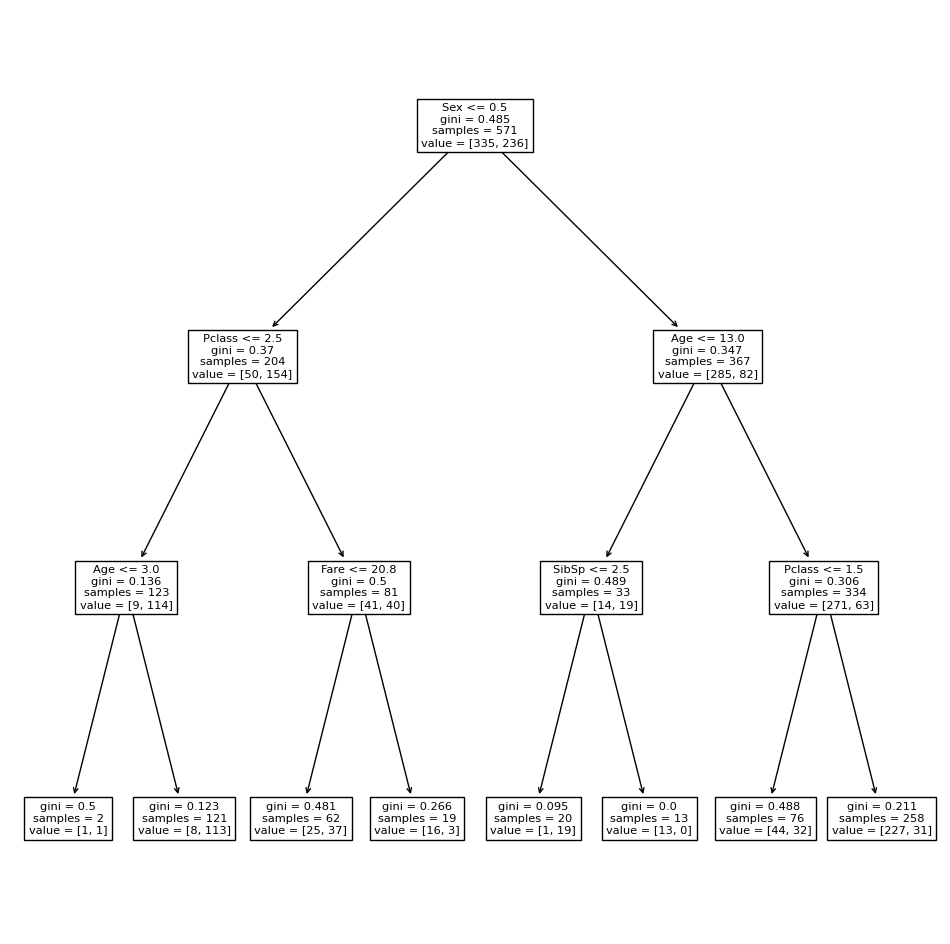

In [128]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_dec_tree, feature_names = df.columns[1:]);